In [15]:
import geopandas as gpd
import pandas as pd
from datetime import datetime

In [16]:
states = gpd.read_file('raw/spatial/us-states/cb_2018_us_state_500k.shp')

<AxesSubplot:>

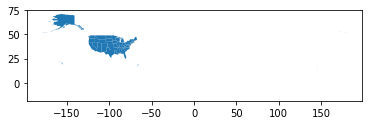

In [17]:
states.plot()

In [18]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [19]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


In [20]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [21]:
# Join / merge data

In [22]:
# 1 Read dataframe

In [23]:
adv = pd.read_excel('raw/asd/ADV_AllData.xlsx')

In [24]:
adv.head()

,Location,Denominator,Prevalence,Lower CI,Upper CI,Year,Source
0,AZ,45322.0,6.5,5.8,7.3,2000,addm
1,GA,43593.0,6.5,5.8,7.3,2000,addm
2,MD,21532.0,5.5,4.6,6.6,2000,addm
3,NJ,29714.0,9.9,8.9,11.1,2000,addm
4,SC,24535.0,6.3,5.4,7.4,2000,addm


In [25]:
# 2 Pivot table - to make it clean we will create multiple tables per source type

In [26]:
sources = adv['Source'].unique()

sourced_regions = {}

In [27]:
for source in sources:
    ds = adv[adv['Source'] == source].copy()
    piv = ds.pivot(index='Location', columns='Year', values=['Denominator', 'Lower CI', 'Upper CI', 'Prevalence'])
    piv.columns = [f'{col[0]}-{col[1]}' for col in piv.columns.values]
    sourced_regions[source] = piv

In [28]:
# 3 Now merge each table and save it into a spatial table for future analysis

In [31]:
def create_fname(region_name, directory='processed-spatial/'):
    dt = str(datetime.now())
    fname = directory + region_name + '_' + dt + '.json'
    return fname

spatial = []

for source in sources:
    merged_geo = pd.merge(states, sourced_regions[source], left_on='STUSPS', right_on='Location')
    filename = create_fname(source)
    merged_geo.to_file(filename, driver='GeoJSON')

/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appr

---